# Clustering NBA Players using K-Means

## Objective

Applied Scikit-learn tools using Python to run and visualize the results of a robust K-means implementation, and as a result segment NBA players into groups with similar traits.

## Data Set

The data set contains information on how a player performed during the 2013-2014 NBA season.

Here are a few of the columns:

    •	player - The player's name
    •	pos - The player's position
    •	g - The number of games the player was in
    •	gs - The number of games in which the player started
    •	pts - The total points the player scored

See [this site](http://www.databasebasketball.com/about/aboutstats.htm) for descriptions of the remaining columns.


## Reading In the Data

In [1]:
import pandas as pd
import numpy as np

nba_raw = pd.read_csv("C:/Users/i7/csv/nba_2013.csv")

# Replace NaN values with zeros.
nba = nba_raw.fillna(0)

# Convert strings to NaN and drop.
nba = nba.convert_objects(convert_numeric=True).dropna()
    
# The names of the columns in the data.
print("nba.columns.values:", nba.columns.values)

nba.columns.values: ['Rk' 'Player' 'Pos' 'Age' 'Tm' 'G' 'GS' 'MP' 'FG' 'FGA' 'FG%' '3P' '3PA'
 '3P.1' '2P' '2PA' '2P.1' 'eFG%' 'FT' 'FTA' 'FT%' 'ORB' 'DRB' 'TRB' 'AST'
 'STL' 'BLK' 'TOV' 'PF' 'PTS']


F:\ANACONDA\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [2]:
nba.head(5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,Quincy Acy,PF,22.0,TOR,29.0,0.0,342.0,42.0,75.0,...,0.816,30.0,47.0,77.0,11.0,13.0,15.0,17.0,53.0,116.0
1,2.0,Jeff Adrien,PF,26.0,CHA,52.0,5.0,713.0,72.0,168.0,...,0.650,68.0,128.0,196.0,36.0,18.0,27.0,32.0,80.0,209.0
2,3.0,Arron Afflalo,SF,27.0,ORL,64.0,64.0,2307.0,397.0,905.0,...,0.857,29.0,210.0,239.0,206.0,40.0,11.0,138.0,137.0,1057.0
3,4.0,Josh Akognon,PG,26.0,DAL,3.0,0.0,9.0,2.0,4.0,...,0.000,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,5.0
4,5.0,Cole Aldrich,C,24.0,TOT,45.0,0.0,388.0,44.0,80.0,...,0.600,30.0,90.0,120.0,9.0,5.0,23.0,23.0,60.0,100.0


In [3]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573 entries, 0 to 595
Data columns (total 30 columns):
Rk        573 non-null float64
Player    573 non-null object
Pos       573 non-null object
Age       573 non-null float64
Tm        573 non-null object
G         573 non-null float64
GS        573 non-null float64
MP        573 non-null float64
FG        573 non-null float64
FGA       573 non-null float64
FG%       573 non-null float64
3P        573 non-null float64
3PA       573 non-null float64
3P.1      573 non-null float64
2P        573 non-null float64
2PA       573 non-null float64
2P.1      573 non-null float64
eFG%      573 non-null float64
FT        573 non-null float64
FTA       573 non-null float64
FT%       573 non-null float64
ORB       573 non-null float64
DRB       573 non-null float64
TRB       573 non-null float64
AST       573 non-null float64
STL       573 non-null float64
BLK       573 non-null float64
TOV       573 non-null float64
PF        573 non-null float64

## Point Guards

Visualize the types of point guards as well as group similar point guards together using 2 features:

    Assist to Turnover Ratio -- is a good indicator for performance in games as it quantifies the number of scoring opportunities that player created.
    Points Per Game -- since effective Point Guards not only set up scoring opportunities but also take a lot of the shots themselves.

In [4]:
point_guards = nba[nba['Pos'] == 'PG'].copy()
point_guards.head(5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3,4.0,Josh Akognon,PG,26.0,DAL,3.0,0.0,9.0,2.0,4.0,...,0.000,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,5.0
28,21.0,D.J. Augustin,PG,25.0,IND,76.0,5.0,1226.0,103.0,294.0,...,0.838,20.0,71.0,91.0,170.0,34.0,3.0,68.0,64.0,356.0
34,25.0,Leandro Barbosa,PG,30.0,BOS,41.0,2.0,513.0,83.0,193.0,...,0.756,8.0,38.0,46.0,58.0,17.0,6.0,21.0,51.0,215.0
35,26.0,Jose Barea,PG,28.0,MIN,74.0,2.0,1713.0,316.0,758.0,...,0.784,34.0,173.0,207.0,294.0,32.0,0.0,145.0,131.0,834.0
46,35.0,Jerryd Bayless,PG,24.0,MEM,80.0,4.0,1765.0,260.0,621.0,...,0.836,22.0,154.0,176.0,264.0,59.0,17.0,120.0,168.0,693.0


## Points Per Game

The data set doesn't come with Points Per Game values, calculate those using each player's total points (pts) and the number of games (g) they played. 

In [5]:
point_guards['PPG'] = point_guards['PTS'] / point_guards['G']

# Sanity check, make sure ppg = pts/g.
point_guards[['PTS', 'G', 'PPG']].head(5)

,PTS,G,PPG
3,5.0,3.0,1.666667
28,356.0,76.0,4.684211
34,215.0,41.0,5.243902
35,834.0,74.0,11.270270
46,693.0,80.0,8.662500


## Assist Turnover Ratio

Create a column, atr, for the Assist Turnover Ratio, which is calculated by dividing total assists (ast) by total turnovers (tov)

In [6]:
point_guards = point_guards[point_guards['TOV'] != 0]
point_guards['ATR'] = point_guards['AST'] / point_guards['TOV']

point_guards[['PTS', 'G', 'PPG', 'ATR']].head(5)

,PTS,G,PPG,ATR
28,356.0,76.0,4.684211,2.500000
34,215.0,41.0,5.243902,2.761905
35,834.0,74.0,11.270270,2.027586
46,693.0,80.0,8.662500,2.200000
51,181.0,45.0,4.022222,2.545455


## Visualizing the Point Guards

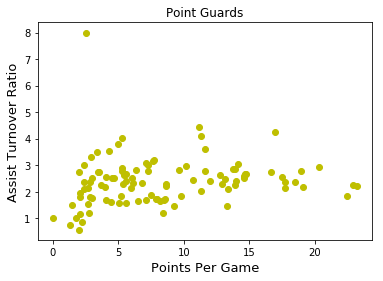

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(point_guards['PPG'], point_guards['ATR'], c='y')
plt.title("Point Guards")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)

## Clustering Players

Set k to 5 since want K-Means to segment our data into 5 clusters.

#### The Algorithm

Step 1 (Assign to Cluster) For each player, calculate the Euclidean distance between that player's coordinates, or values for atr & ppg, and each of the centroids' coordinates. Assign the player to the cluster whose centroid is the closest to, or has the lowest Euclidean distance to, the player's values.

Step 2 (Recalculate Centroids) For each cluster, compute the new centroid by calculating the geometric mean of all of the points (players) in that cluster. Calculate the geometric mean by taking the average of all of the X values (atr) and the average of all of the Y values (ppg) of the points in that cluster.

Iterate Repeat steps 1 & 2 until the clusters are no longer moving and have converged.

In [9]:
import random

num_clusters = 5

# Use numpy's random function to generate a list, length: num_clusters, of indices.
random_initial_points = np.random.choice(point_guards.index, size=num_clusters)

# Use the random indices to create the centroids.
centroids = point_guards.ix[random_initial_points]

#### Visualize Centroids

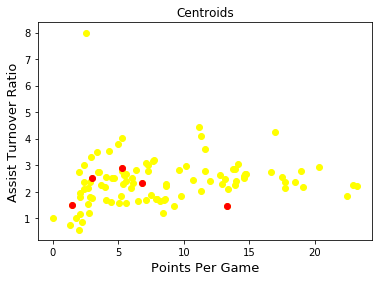

In [11]:
plt.scatter(point_guards['PPG'], point_guards['ATR'], c='yellow')
plt.scatter(centroids['PPG'], centroids['ATR'], c='red')
plt.title("Centroids")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)

#### Create a dictionary to mapping the cluster_id and coordinates

In [12]:
def centroids_to_dict(centroids):
    dictionary = dict()
    # Iterating counter we use to generate a cluster_id.
    counter = 0

    # Iterate a pandas data frame row-wise using .iterrows().
    for index, row in centroids.iterrows():
        coordinates = [row['PPG'], row['ATR']]
        dictionary[counter] = coordinates
        counter += 1

    return dictionary

centroids_dict = centroids_to_dict(centroids)
print("centroids_dict", centroids_dict)

centroids_dict {0: [5.285714285714286, 2.875], 1: [6.7875, 2.3333333333333335], 2: [13.32, 1.4780487804878049], 3: [2.9791666666666665, 2.508771929824561], 4: [1.4285714285714286, 1.5]}


#### Euclidean Distance

Create the function which takes in 2 lists (the player's values for ppg and atr and the centroid's values for ppg and atr).

In [13]:
import math

def calculate_distance(centroid, player_values):
    root_distance = 0
    
    for x in range(0, len(centroid)):
        difference = centroid[x] - player_values[x]
        squared_difference = difference**2
        root_distance += squared_difference

    euclid_distance = math.sqrt(root_distance)
    return euclid_distance

q = [5, 2]
p = [3,1]

# Sqrt(5) = ~2.24
print("calculate_distance(q, p)", calculate_distance(q, p))

calculate_distance(q, p) 2.23606797749979


### Step 1 (Assign to Cluster)

In [14]:
def assign_to_cluster(row):
    lowest_distance = -1
    closest_cluster = -1
    
    for cluster_id, centroid in centroids_dict.items():
        df_row = [row['PPG'], row['ATR']]
        euclidean_distance = calculate_distance(centroid, df_row)
        
        if lowest_distance == -1:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id 
        elif euclidean_distance < lowest_distance:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id
    return closest_cluster

point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)

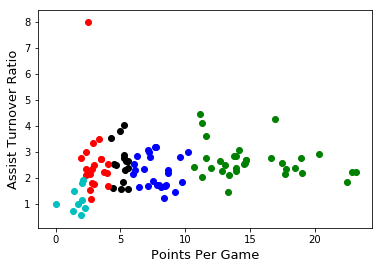

In [15]:
# Visualizing clusters
def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['PPG'], clustered_df['ATR'], c=colors[n-1])
        plt.xlabel('Points Per Game', fontsize=13)
        plt.ylabel('Assist Turnover Ratio', fontsize=13)

visualize_clusters(point_guards, 5)

### Step 2 (Recalculate Centroids)

In [16]:
def recalculate_centroids(df):
    new_centroids_dict = dict()
    
    for cluster_id in range(0, num_clusters):
        values_in_cluster = df[df['cluster'] == cluster_id]
        # Calculate new centroid using mean of values in the cluster.
        new_centroid = [np.average(values_in_cluster['PPG']), np.average(values_in_cluster['ATR'])]
        new_centroids_dict[cluster_id] = new_centroid
    return new_centroids_dict

centroids_dict = recalculate_centroids(point_guards)
print("centroids_dict:", centroids_dict)

centroids_dict: {0: [5.101070376207212, 2.5760929574331128], 1: [7.7918375708898511, 2.2373722553779576], 2: [15.306191307175485, 2.6458109251997173], 3: [3.0152504648044927, 2.6240498192753505], 4: [1.6613582567529934, 1.1739550264550265]}


### Repeat Step 1 (Assign to Cluster)

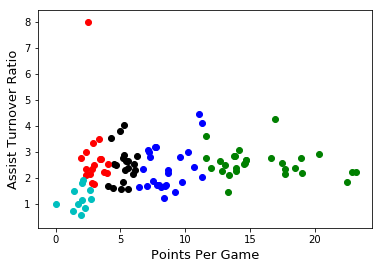

In [17]:
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

### Repeat Step 2 (Recalculate Centroids) and Step 1 (Assign to Cluster)

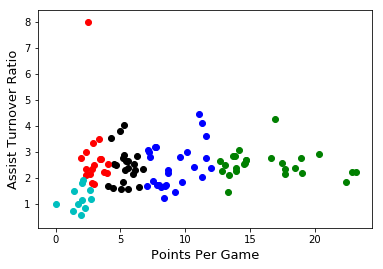

In [18]:
centroids_dict = recalculate_centroids(point_guards)
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

#### Summary :

Repeating Steps 1 and 2 and run visualize_clusters, notice that a few of the points are changing clusters between every iteration (especially in areas where 2 clusters almost overlap), but otherwise, the clusters visually look like they don't move a lot after every iteration. This means 2 things:

-- K-Means doesn't cause massive changes in the makeup of clusters between iterations, meaning that it will always converge and become stable

-- Because K-Means is conservative between iterations, where we pick the initial centroids and how we assign the players to clusters initially matters a lot

## Sklearn Implementation of K-Means

This does some intelligent things like re-running the entire clustering process lots of times with random initial centroids so the final results are a little less biased on one passthrough's initial centroids.

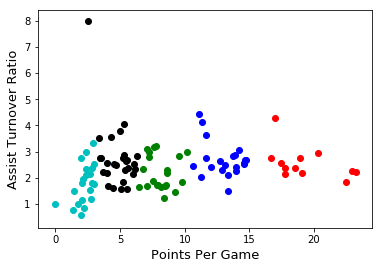

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(point_guards[['PPG', 'ATR']])
point_guards['cluster'] = kmeans.labels_

visualize_clusters(point_guards, num_clusters)